# 7. Персептрон

In [1]:
from setup_libs import *

In [2]:
import torch

## 7.1 Нейрон (персептрон)

### Устройство нейрона

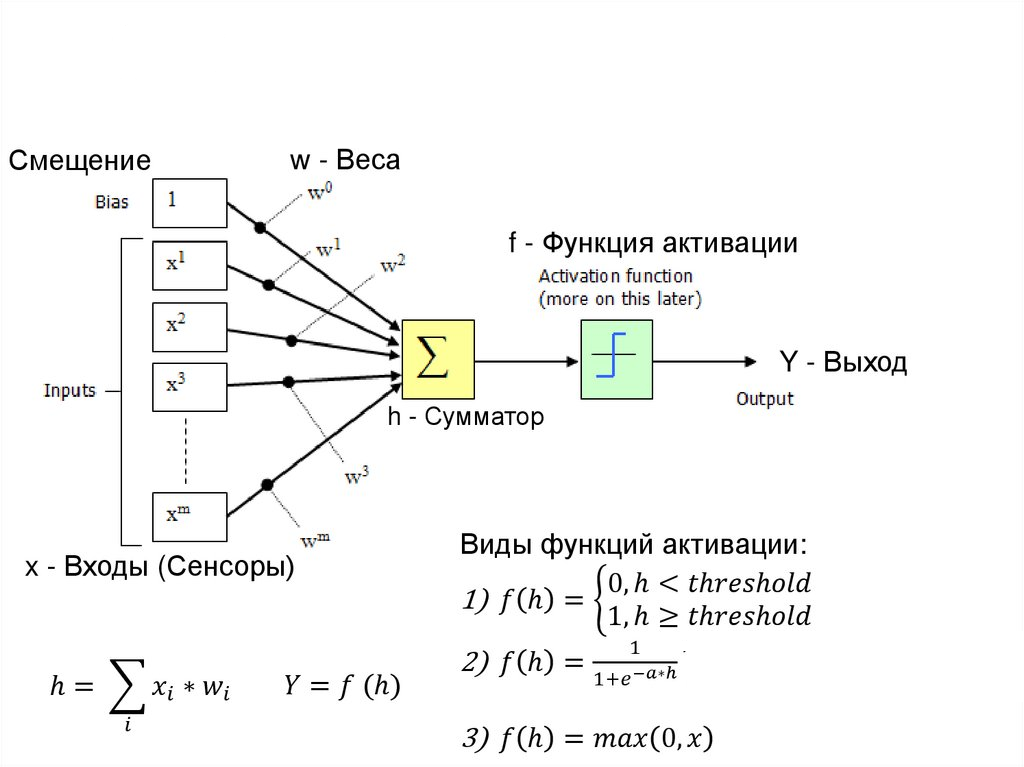

In [3]:
Image('images/perc1.png')

In [4]:
from torch.nn import Linear, Sigmoid, Sequential, Threshold

x = torch.FloatTensor([[.5, .5]])

l = Linear(2, 1) # по сути матричное перемножение на веса 2 -> 1

# если ручками не обозначить, то будут произвольные значения браться
l.weight.data = torch.FloatTensor([[1, 1]])
l.bias.data   = torch.FloatTensor([[-1]])

s = Sigmoid()

def net(x):
    return s(l(x))

net(x)

tensor([[0.5000]], grad_fn=<SigmoidBackward>)

Рисуем линию
$x_1 + x_2 - 1 = 0$

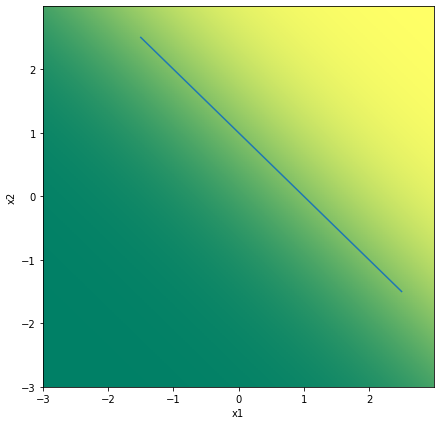

In [5]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = net(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='summer')
plt.xlabel('x1')
plt.ylabel('x2')

x_1 = np.linspace(-1.5, 2.5, 100)
x_2 = 1 - x_1 

ax.plot(x_1, x_2)

### Логические функции через нейрон

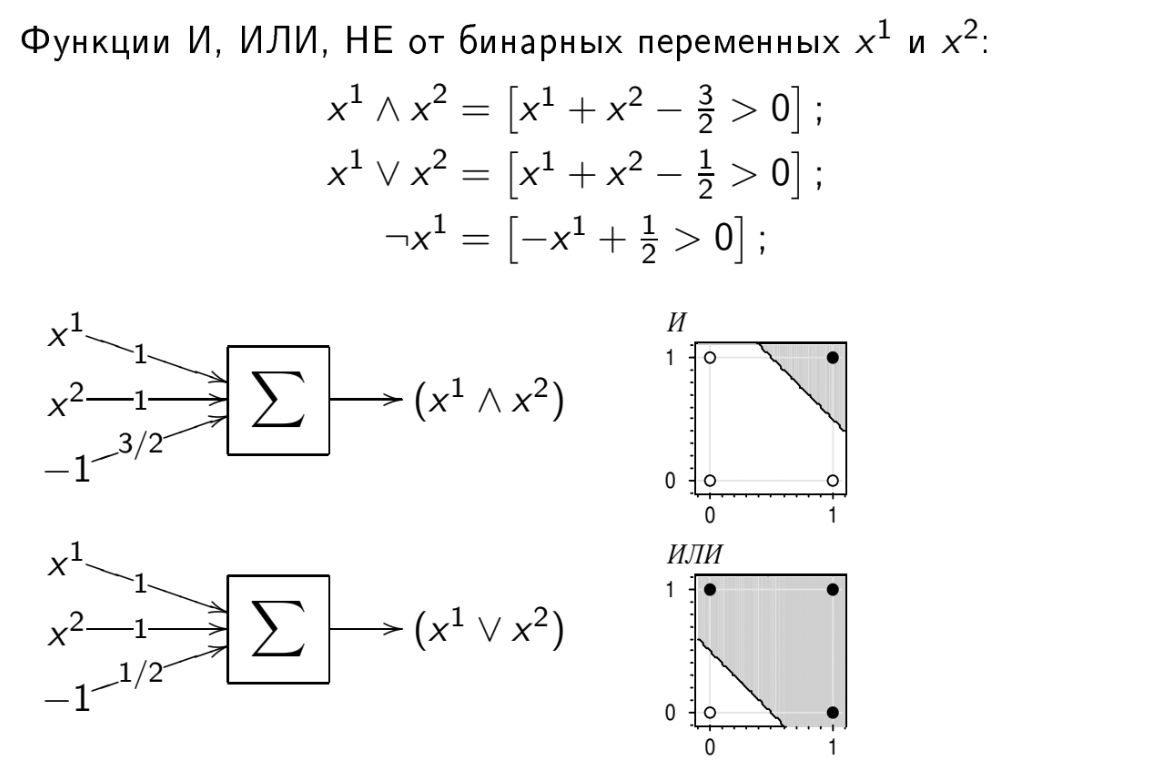

In [6]:
Image('images/logic1.png', width=800)

In [7]:
x = torch.FloatTensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])

In [8]:
def AND(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]])
    lin.bias.data   = torch.FloatTensor([[-1.5]])

    return (lin(x) > 0).float() # функция активации

AND(x)

tensor([[0.],
        [0.],
        [0.],
        [1.]])

In [9]:
def OR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, 1]]) 
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float() #функция активации

OR(x)

tensor([[0.],
        [1.],
        [1.],
        [1.]])

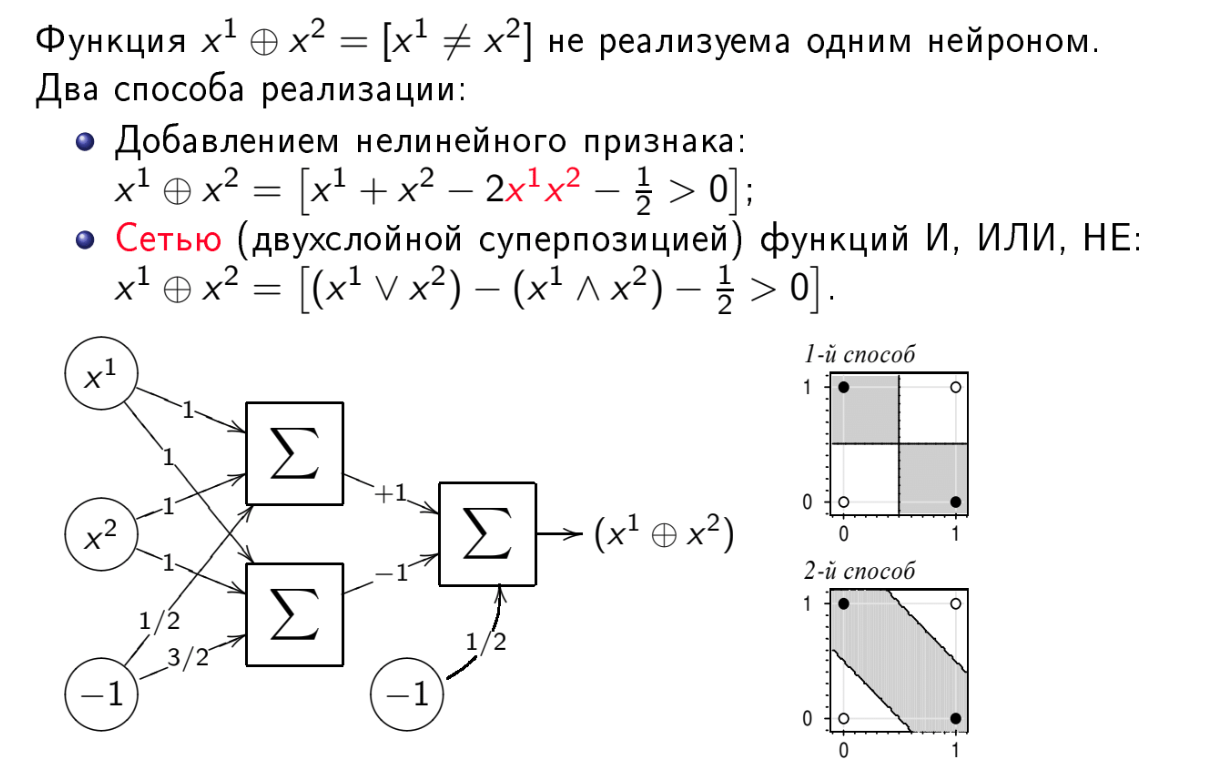

In [13]:
Image('images/xor.png', width=800)

In [10]:
second_input = torch.cat([OR(x), AND(x)], dim=1)
second_input

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.]])

In [11]:
def XOR(x):
    lin = Linear(2, 1)

    # ручная инициализация
    lin.weight.data = torch.FloatTensor([[1, -1]])
    lin.bias.data   = torch.FloatTensor([[-0.5]])

    return (lin(x) > 0).float()

XOR(second_input) 

tensor([[0.],
        [1.],
        [1.],
        [0.]])

Зачем обозначать руками нейроны, когда можно целые слои  

In [12]:
def OR_AND(x):
    lin1 = Linear(2, 2) #СЛОЙ 2->2
    
    lin1.weight.data = torch.FloatTensor([[1, 1], 
                                          [1, 1]])
    
    lin1.bias.data   = torch.FloatTensor([[-0.5, -1.5]])
    
    return (lin1(x) > 0).float()

XOR(OR_AND(x))

tensor([[0.],
        [1.],
        [1.],
        [0.]])

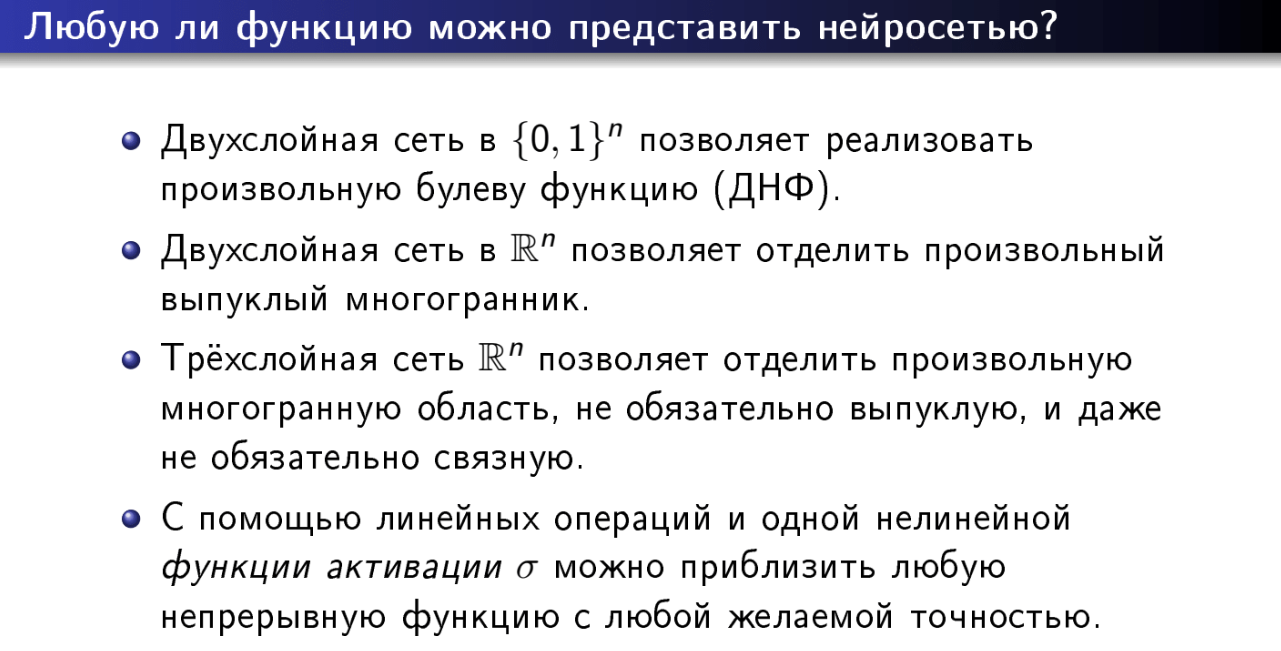

In [18]:
Image('images/percres.png', width=800)

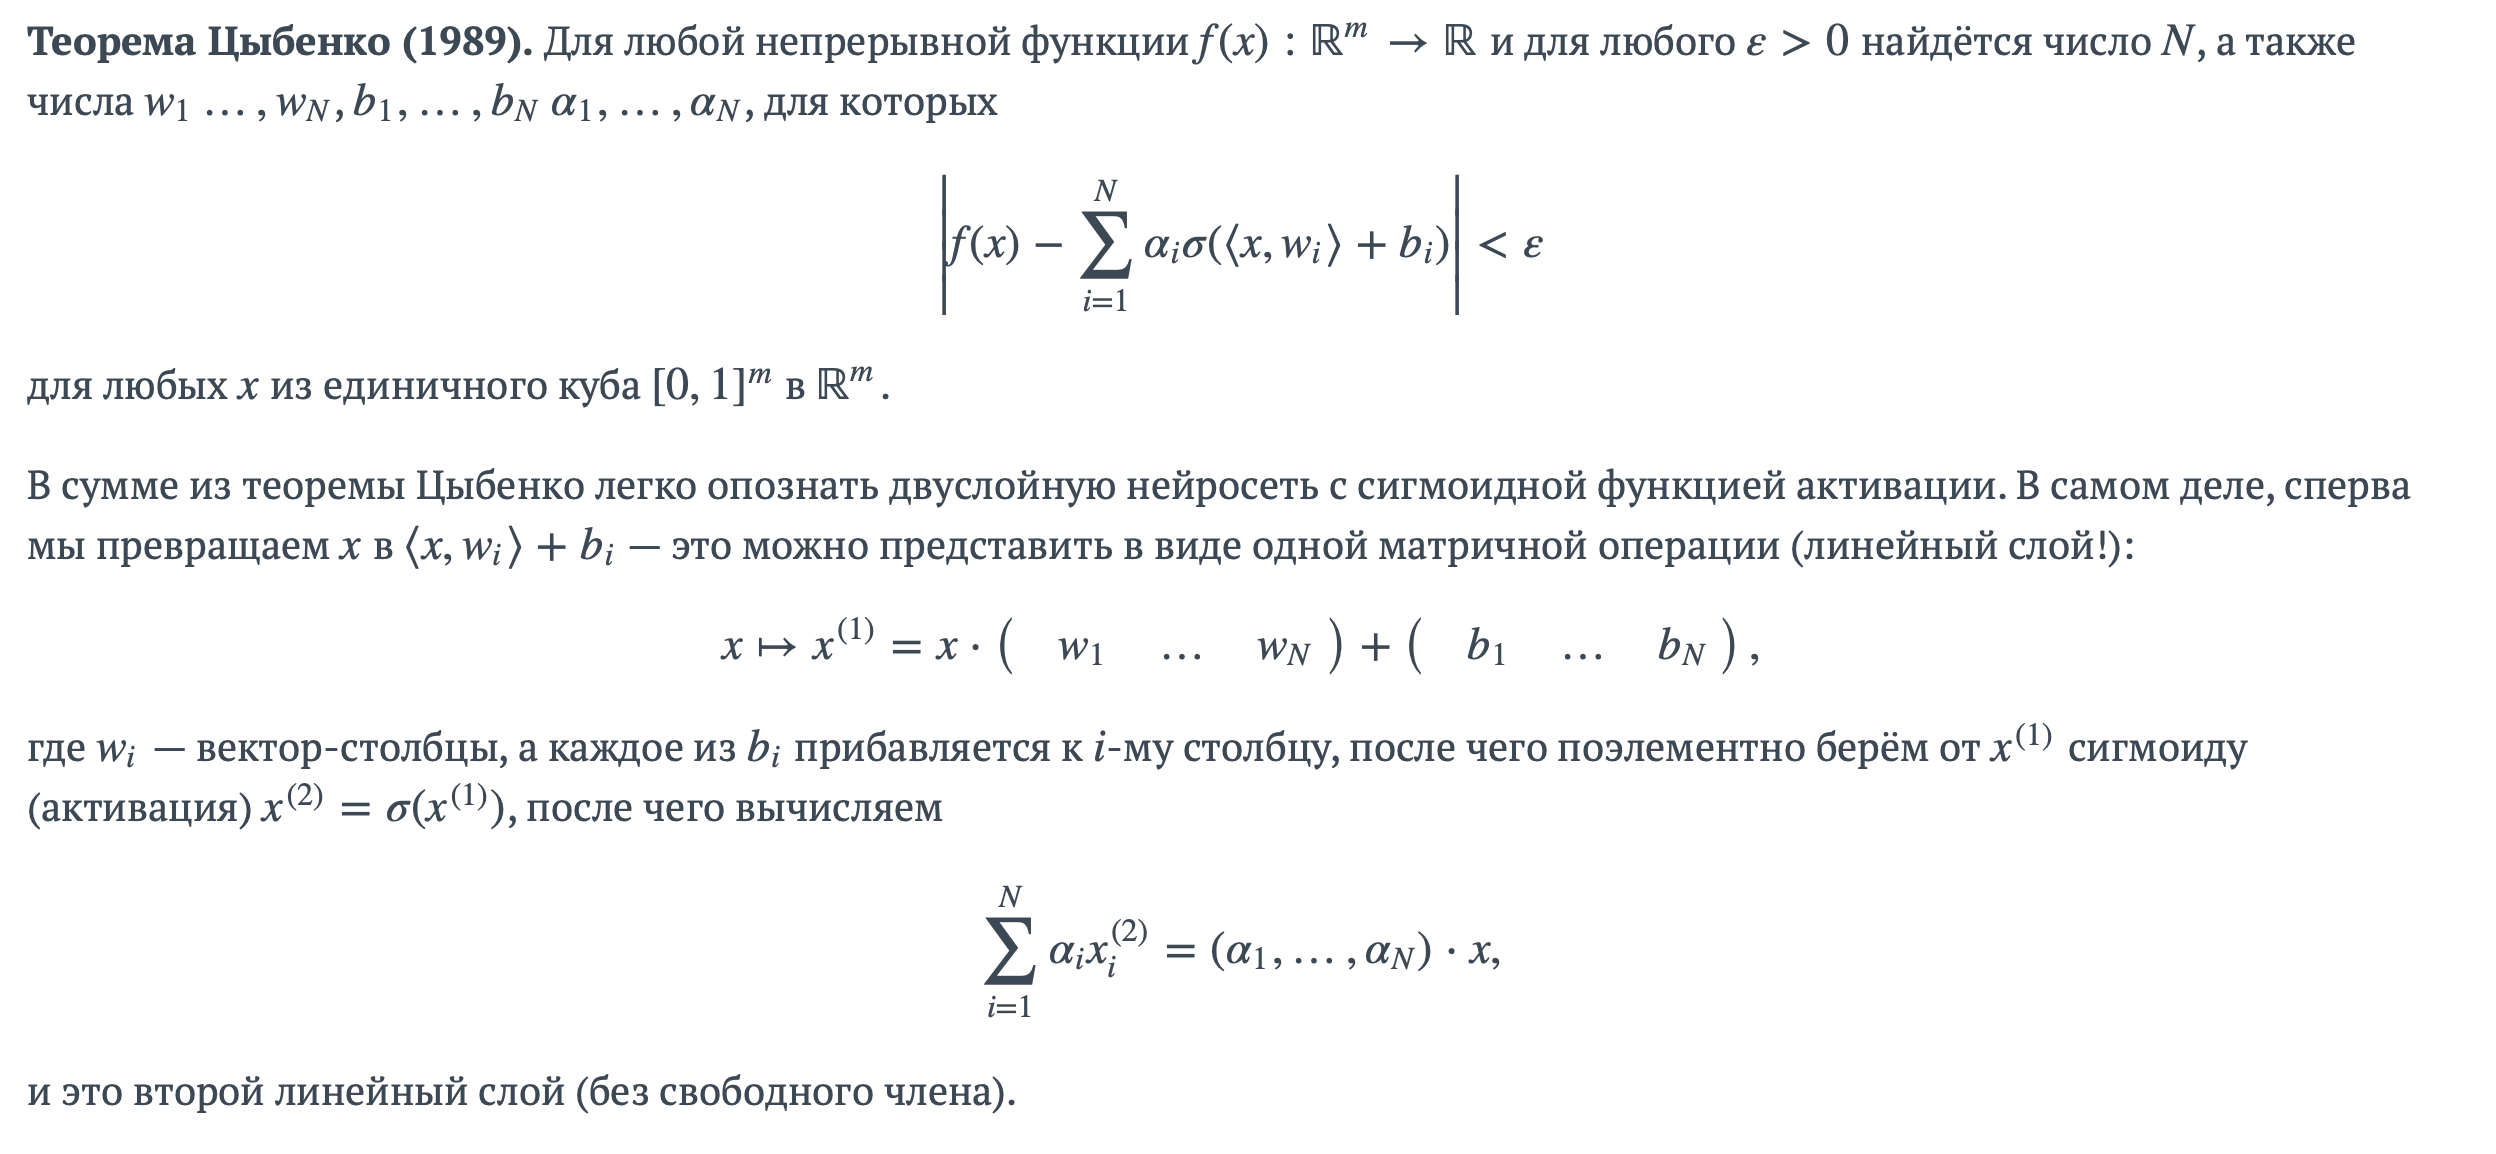

In [14]:
Image('images/cybenko.png', width=800)

## 7.2 Пример обучения одномерной нейронной сети
[Взято из туториала](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

Хотим с помощью нейронки обучить функцию $y = sin(x)$ 

в пространстве полиномов $y = a + bx + cx^2 + dx^3$

### 7.2.1 Градиентный спуск на торче и тензорах

99 108.00789642333984
199 76.21971130371094
299 54.670101165771484
399 40.04545211791992
499 30.10944175720215
599 23.351383209228516
699 18.749698638916016
799 15.612749099731445
899 13.471875190734863
999 12.009136199951172
1099 11.00854206085205
1199 10.323291778564453
1299 9.853500366210938
1399 9.53104019165039
1499 9.309452056884766
1599 9.157010078430176
1699 9.052021980285645
1799 8.979634284973145
1899 8.929669380187988
1999 8.895151138305664
Result: y = -0.007832896895706654 + 0.8520563244819641 x + 0.0013513043522834778 x^2 + -0.09266405552625656 x^3


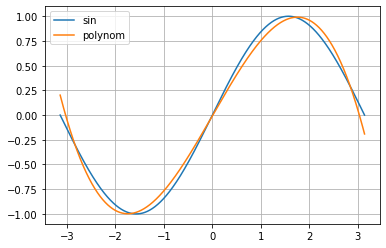

In [15]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
def f(x):
    return a + b * x + c * x**2 + d * x**3

plt.plot(x,np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

### 7.2.2 Используем Autograd

99 437.5595703125
199 294.0465087890625
299 198.64686584472656
399 135.20675659179688
499 93.0040283203125
599 64.9185791015625
699 46.220672607421875
799 33.767051696777344
899 25.468711853027344
999 19.93657684326172
1099 16.246734619140625
1199 13.784320831298828
1299 12.140176773071289
1399 11.04173469543457
1499 10.307441711425781
1599 9.8162202835083
1699 9.487433433532715
1799 9.267213821411133
1899 9.119589805603027
1999 9.0205659866333
Result: y = 0.0076433452777564526 + 0.8447855114936829 x + -0.0013186057331040502 x^2 + -0.09162984788417816 x^3


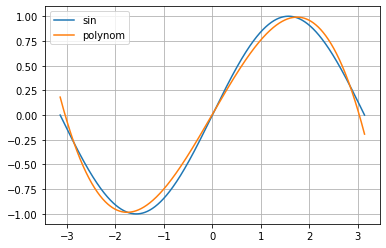

In [15]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

def f(x):
    return a.detach().numpy() + b.detach().numpy() * x + c.detach().numpy() * x ** 2 + d.detach().numpy() * x ** 3

xx = x.numpy()

plt.plot(xx, np.sin(x), label='sin')
plt.plot(xx, f(xx), label='polynom')
plt.legend()
plt.grid()

## 7.2.3 Используем нейросеть + встроенный лосс

In [23]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [24]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [19]:
# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

for x in model.parameters():
    print(x)

Parameter containing:
tensor([[ 0.0564, -0.2513,  0.4860]], requires_grad=True)
Parameter containing:
tensor([-0.5281], requires_grad=True)


99 591.8045654296875
199 396.496337890625
299 266.7115783691406
399 180.44091796875
499 123.07545471191406
599 84.91671752929688
699 59.52448654174805
799 42.62104034423828
899 31.363574981689453
999 23.863012313842773
1099 18.863197326660156
1199 15.528731346130371
1299 13.303764343261719
1399 11.818310737609863
1499 10.826004028320312
1599 10.16270637512207
1699 9.719085693359375
1799 9.422179222106934
1899 9.223331451416016
1999 9.09006404876709
Result: y = -0.008585856296122074 + 0.8427515625953674 x + 0.00148120301309973 x^2 + -0.09134053438901901 x^3


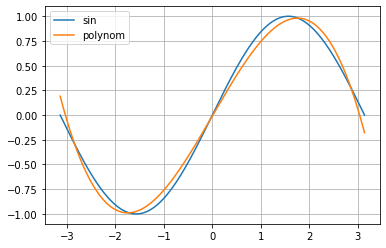

In [25]:
# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

x = x.detach()
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.legend()
plt.grid()

## 7.2.4 Используем стохастический спуск. Идея обособленного оптимайзера

99 301.5738830566406
199 208.08349609375
299 144.60220336914062
399 101.44984436035156
499 72.08370971679688
599 52.076778411865234
699 38.4307861328125
799 29.112537384033203
899 22.742332458496094
999 18.382455825805664
1099 15.394990921020508
1199 13.345670700073242
1299 11.938230514526367
1399 10.970572471618652
1499 10.304508209228516
1599 9.845539093017578
1699 9.528928756713867
1799 9.310281753540039
1899 9.159137725830078
1999 9.054546356201172
Result: y = -0.01386485155671835 + 0.8488554358482361 x + 0.0023919162340462208 x^2 + -0.09220875799655914 x^3


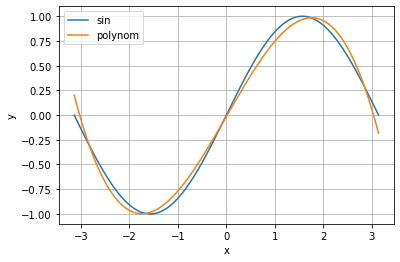

In [56]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Сделали шаблон сети
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Спуск
for t in range(2000):
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


# просто рисовалка      
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
def f(x):
    return linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + \
           linear_layer.weight[:, 1].item() * x ** 2 + linear_layer.weight[:, 2].item() * x ** 3

plt.plot(x, np.sin(x), label='sin')
plt.plot(x, f(x), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

![title](https://cs231n.github.io/assets/nn3/opt1.gif)

## 7.2.5 А если взять несколько слоев?

99 862.5868530273438
199 781.0914916992188
299 706.028076171875
399 612.8472900390625
499 468.297119140625
599 235.58253479003906
699 38.0203857421875
799 9.163406372070312
899 8.817840576171875
999 8.817167282104492
1099 8.817160606384277
1199 8.817161560058594
1299 8.817158699035645
1399 8.817161560058594
1499 8.817160606384277
1599 8.817160606384277
1699 8.817159652709961
1799 8.817160606384277
1899 8.817160606384277
1999 8.817160606384277


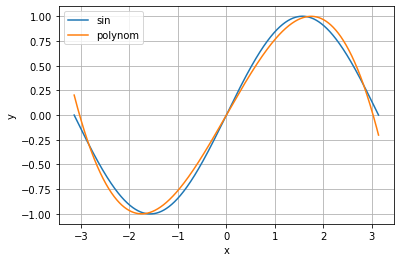

In [30]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# МНО00ГО00СЛО00ЙНАЯ СЕТЬ
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# Обозначили лосс
loss_fn = torch.nn.MSELoss(reduction='sum')

# Выбрали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    
    # Нашли результат на текущей сети
    y_pred = model(xx)

    # Посчитали ошибку
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    
# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

# Так и еще раз на закрепление:
* FORWARD (посчитали вперед по существующей сети)
* LOSS (посчитали ошибку)
* ZERO_GRAD (обнулили градиенты)
* BACKWARD (посчитали производные)
* UPDATE Weights (обновили веса)


## А имеет ли смысл брать несколько слоев?

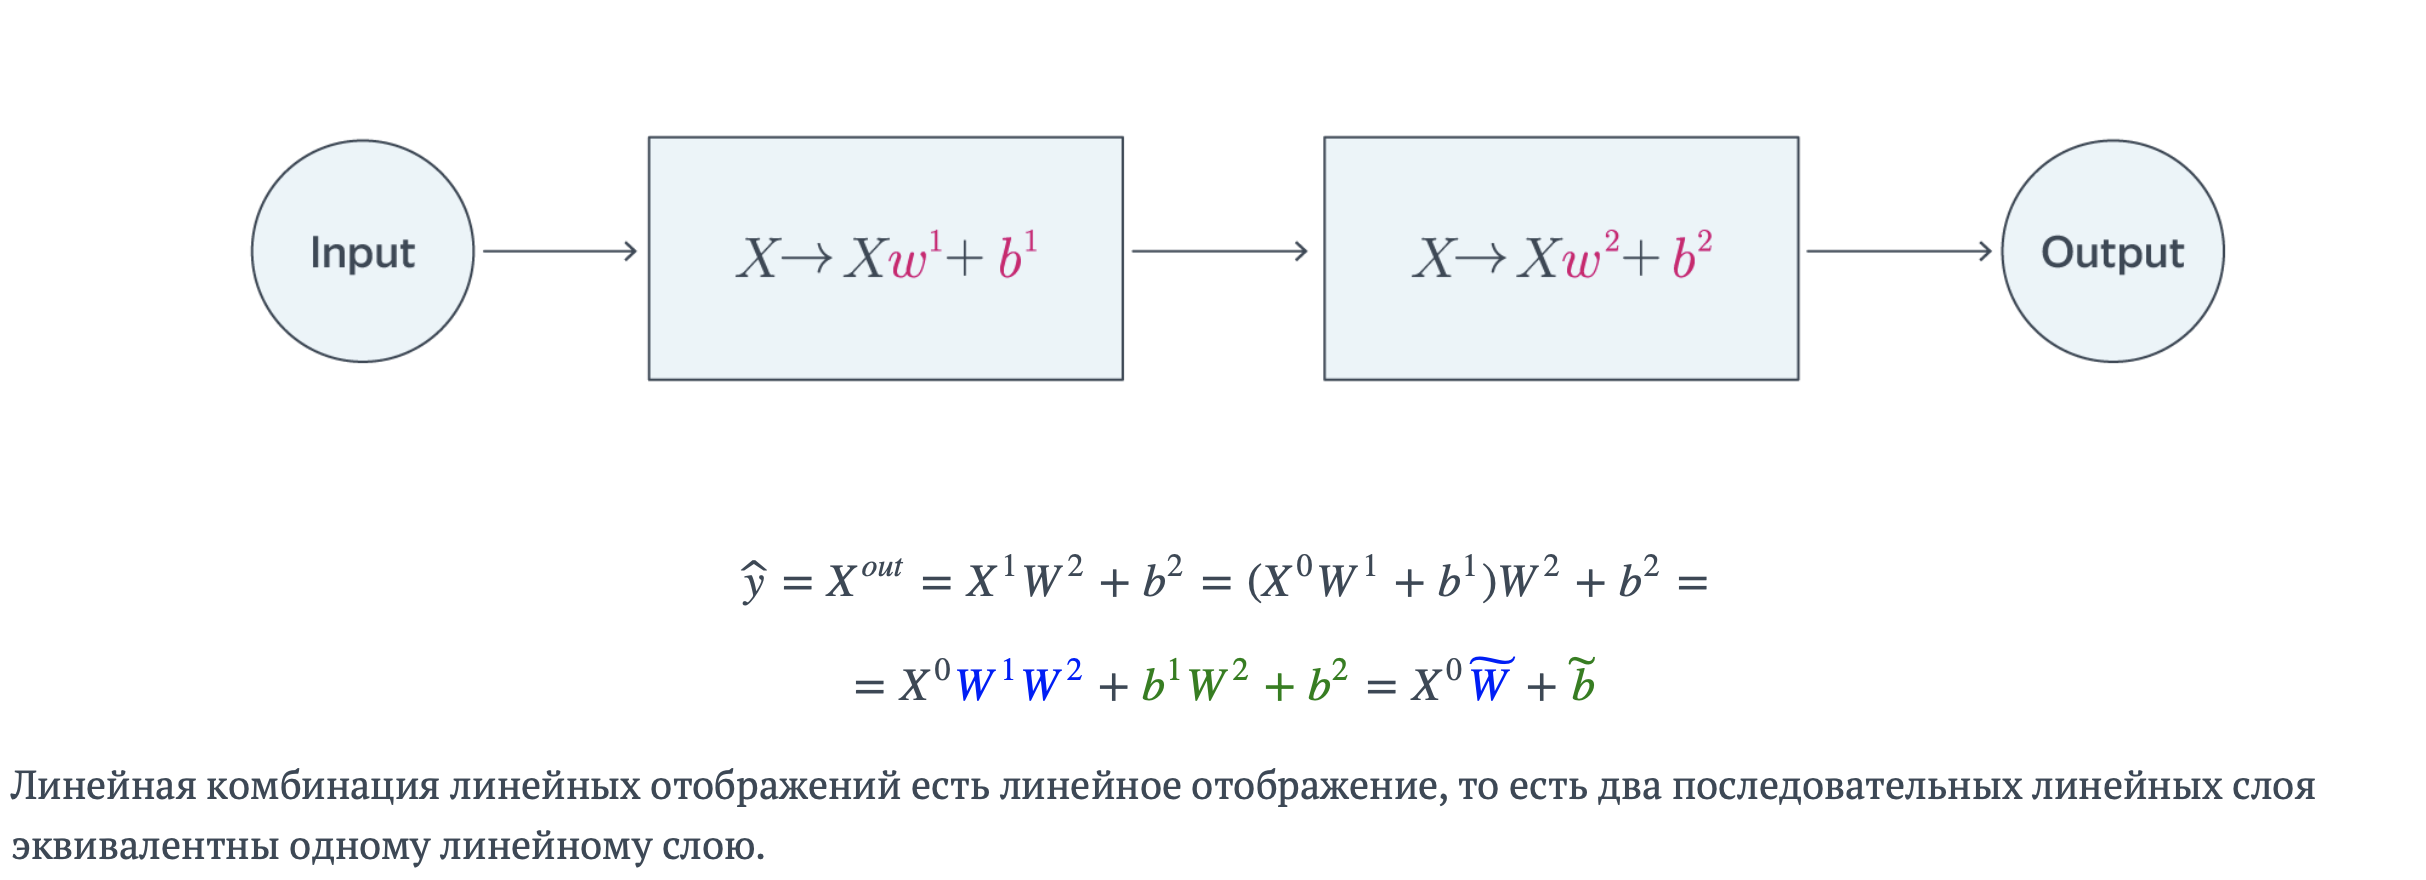

In [27]:
Image('images/2linear.png')